<a href="https://colab.research.google.com/github/cepdnaclk/e18-4yp-Predicting-Forex-Currency-Exchange-Rate-using-Machine-Learning/blob/main/models/LKRUSD/LKRUSD_IN1_LSTM_GRID_Version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_ta

In [ ]:
import pandas as pd
import pandas_ta as ta

data = pd.read_csv('LKR=X.csv')

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-09,173.020004,176.050003,172.539993,176.050003,176.050003,0.0
1,2019-07-10,172.490005,176.050003,172.479996,176.050003,176.050003,0.0
2,2019-07-11,171.839996,176.050003,171.839996,176.050003,176.050003,0.0
3,2019-07-12,172.630005,176.050003,172.360001,176.050003,176.050003,0.0
4,2019-07-15,172.160004,175.639999,172.160004,176.050003,176.050003,0.0
...,...,...,...,...,...,...,...
1301,2024-07-03,301.586273,301.628357,301.081665,302.451538,302.451538,0.0
1302,2024-07-04,300.190399,300.962646,300.190399,301.081665,301.081665,0.0
1303,2024-07-05,NaN,NaN,NaN,NaN,NaN,NaN
1304,2024-07-08,301.584656,301.584656,301.255280,301.793793,301.793793,0.0


In [ ]:
data['T-4'] = data['Close']
data['T-3'] = data['Close'].shift(-1)
data['T-2'] = data['Close'].shift(-2)
data['T-1'] = data['Close'].shift(-3)
data['T0'] = data['Close'].shift(-4)

data['SMA_5_H'] = ta.sma(data['High'], length=5).shift(-4)
data['SMA_5_L'] = ta.sma(data['Low'], length=5).shift(-4)
data['EMA_5_C'] = ta.ema(data['Close'], length=5).shift(-4)
data['RSI'] = ta.rsi(data['Close'], length=14).shift(-14)

#Closing value of the next day
data['T_F'] = data['Close'].shift(-5)

print(data.head(10))


         Date        Open        High         Low       Close   Adj Close  \
0  2019-07-09  173.020004  176.050003  172.539993  176.050003  176.050003   
1  2019-07-10  172.490005  176.050003  172.479996  176.050003  176.050003   
2  2019-07-11  171.839996  176.050003  171.839996  176.050003  176.050003   
3  2019-07-12  172.630005  176.050003  172.360001  176.050003  176.050003   
4  2019-07-15  172.160004  175.639999  172.160004  176.050003  176.050003   
5  2019-07-16  172.869995  175.889999  172.869995  175.639999  175.639999   
6  2019-07-17  172.779999  175.649994  172.779999  175.660004  175.660004   
7  2019-07-18  172.429993  175.669998  172.429993  175.589996  175.589996   
8  2019-07-19  171.850006  175.759995  171.850006  175.649994  175.649994   
9  2019-07-22  173.000000  175.839996  173.000000  172.759995  172.759995   

   Volume         T-4         T-3         T-2         T-1          T0  \
0     0.0  176.050003  176.050003  176.050003  176.050003  176.050003   
1     

In [ ]:
print(data.tail(10))

            Date        Open        High         Low       Close   Adj Close  \
1296  2024-06-26  302.377350  302.377350  302.257019  302.150299  302.150299   
1297  2024-06-27  302.367401  302.784454  302.367401  302.257019  302.257019   
1298  2024-06-28  302.504517  302.815582  302.504517  302.784454  302.784454   
1299  2024-07-01  301.717865  302.067780  301.717865  302.458130  302.458130   
1300  2024-07-02  302.434967  302.451538  302.434967  302.067780  302.067780   
1301  2024-07-03  301.586273  301.628357  301.081665  302.451538  302.451538   
1302  2024-07-04  300.190399  300.962646  300.190399  301.081665  301.081665   
1303  2024-07-05         NaN         NaN         NaN         NaN         NaN   
1304  2024-07-08  301.584656  301.584656  301.255280  301.793793  301.793793   
1305  2024-07-09  303.690002  303.959991  303.369995  303.390015  303.390015   

      Volume         T-4         T-3         T-2         T-1          T0  \
1296     0.0  302.150299  302.257019  302.7

In [ ]:
# Dropping NaN values
data.dropna(inplace=True)

print(data.tail(10))


            Date        Open        High         Low       Close   Adj Close  \
1282  2024-06-06  298.705231  299.649506  298.705231  299.216644  299.216644   
1283  2024-06-07  299.100616  299.451355  299.100616  299.052551  299.052551   
1284  2024-06-10  302.564423  303.249542  299.640289  301.465210  301.465210   
1285  2024-06-11  299.105804  300.489960  299.105804  299.640289  299.640289   
1286  2024-06-12  300.184906  300.184906  298.853668  300.489960  300.489960   
1287  2024-06-13  297.405396  301.337433  297.405396  298.886993  298.886993   
1288  2024-06-14  302.300140  302.300140  300.788269  301.337433  301.337433   
1289  2024-06-17  300.705383  300.705383  300.450409  300.602875  300.602875   
1290  2024-06-18  299.776001  301.782745  299.776001  300.450409  300.450409   
1291  2024-06-19  301.202362  302.005829  301.167297  301.782745  301.782745   

      Volume         T-4         T-3         T-2         T-1          T0  \
1282     0.0  299.216644  299.052551  301.4

In [ ]:
data = data[['Date', 'T-4','T-3','T-2','T-1','T0','SMA_5_H','SMA_5_L','EMA_5_C','RSI','T_F']]

data

,Date,T-4,T-3,T-2,T-1,T0,SMA_5_H,SMA_5_L,EMA_5_C,RSI,T_F
0,2019-07-09,176.050003,176.050003,176.050003,176.050003,176.050003,175.968002,172.275998,176.050003,53.206113,175.639999
1,2019-07-10,176.050003,176.050003,176.050003,176.050003,175.639999,175.936001,172.341998,175.913335,53.309480,175.660004
2,2019-07-11,176.050003,176.050003,176.050003,175.639999,175.660004,175.856000,172.401999,175.828891,53.858618,175.589996
3,2019-07-12,176.050003,176.050003,175.639999,175.660004,175.589996,175.779999,172.519998,175.749260,54.549353,175.649994
4,2019-07-15,176.050003,175.639999,175.660004,175.589996,175.649994,175.721997,172.417999,175.716171,56.867314,172.759995
...,...,...,...,...,...,...,...,...,...,...,...
1287,2024-06-13,298.886993,301.337433,300.602875,300.450409,301.782745,301.626306,299.917474,300.835615,60.370442,302.005829
1288,2024-06-14,301.337433,300.602875,300.450409,301.782745,302.005829,301.759704,300.829297,301.225686,52.184347,301.964508
1289,2024-06-17,300.602875,300.450409,301.782745,302.005829,301.964508,301.826825,301.077722,301.471960,52.184347,301.443451
1290,2024-06-18,300.450409,301.782745,302.005829,301.964508,301.443451,302.097784,301.342871,301.462457,52.184347,302.060181


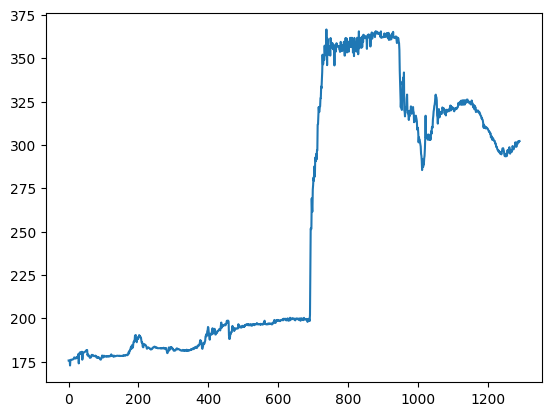

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data.index, data['T_F'])

In [ ]:
dates=data['Date'].to_numpy()
middle_matrix =data[['T-4','T-3','T-2','T-1','T0','SMA_5_H','SMA_5_L','EMA_5_C','RSI']].to_numpy()
X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
Y=data['T_F']

print(dates.shape)
print(X.shape)
print(Y.shape)

(1292,)
(1292, 9, 1)
(1292,)


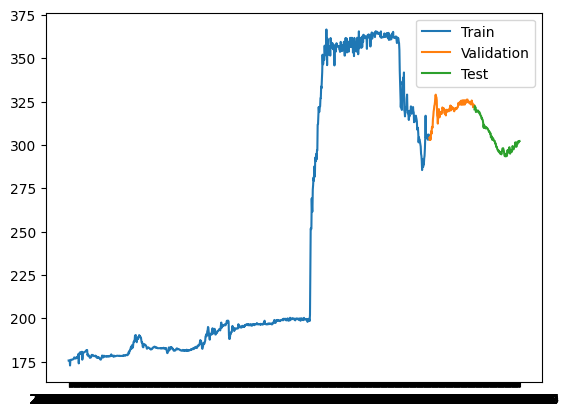

In [ ]:
q_80 = int(len(dates) * .8) #change to 0.8
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], Y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], Y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], Y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Define different parameter values to iterate over
epochs_values = [100, 150]
lstm_units_values = [120, 150, 200]
learning_rate_values = [0.01, 0.001, 0.0001]
dense1_values = [100, 150, 200]
dense2_values = [100, 150, 200]

best_loss = float('inf')
best_epochs = None
best_lstm_units = None
best_learning_rate = None
best_dense2 = None
best_dense1 = None
hist = []

# Define X_train, y_train, X_val, y_val

# Loop over different parameter combinations
for epochs in epochs_values:
    for lstm_units in lstm_units_values:
        for learning_rate in learning_rate_values:
          for dense1 in dense1_values:
            for dense2 in dense2_values:
                print(f"Training model with epochs={epochs}, lstm_units={lstm_units}, learning_rate={learning_rate}")

                # model = Sequential([layers.Input((9, 1)),
                #         layers.LSTM(lstm_units),
                #         layers.Dense(1)])

                # Define the model
                model = Sequential([
                    layers.Input((9, 1)),
                    layers.LSTM(lstm_units),
                    layers.Dense(dense1, activation='relu'),
                    layers.Dense(dense2, activation='relu'),
                    layers.Dense(1)
                ])

                model.compile(loss='mse',
                              optimizer=Adam(learning_rate=learning_rate),
                              metrics=['mean_absolute_error'])

                # Train the model
                history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=0)

                # Check if this combination has the best validation loss so far
                if history.history['loss'][-1] < best_loss:
                    hist = history.history
                    best_loss = history.history['loss'][-1]
                    best_epochs = epochs
                    best_lstm_units = lstm_units
                    best_learning_rate = learning_rate
                    best_dense1 = dense1
                    best_dense2 = dense2

# Print the best combination
print(f"Best combination: epochs={best_epochs}, lstm_units={best_lstm_units}, learning_rate={best_learning_rate}, Validation Loss={best_loss}, best_dense1={best_dense1}, best_dense2={best_dense2}")

# # Add labels and legend
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# # plt.legend()
# plt.show()


Training model with epochs=100, lstm_units=120, learning_rate=0.01


KeyboardInterrupt: 

Epoch 1/150
33/33 [==============================] - 4s 21ms/step - loss: 62146.2891 - mean_absolute_error: 237.9818 - val_loss: 102033.9375 - val_mean_absolute_error: 319.3865
Epoch 2/150
33/33 [==============================] - 0s 6ms/step - loss: 61367.9492 - mean_absolute_error: 236.3268 - val_loss: 100857.4609 - val_mean_absolute_error: 317.5397
Epoch 3/150
33/33 [==============================] - 0s 6ms/step - loss: 60107.6602 - mean_absolute_error: 233.6467 - val_loss: 98466.1562 - val_mean_absolute_error: 313.7528
Epoch 4/150
33/33 [==============================] - 0s 6ms/step - loss: 57358.6797 - mean_absolute_error: 227.6162 - val_loss: 93226.1797 - val_mean_absolute_error: 305.2910
Epoch 5/150
33/33 [==============================] - 0s 6ms/step - loss: 51808.2188 - mean_absolute_error: 214.9157 - val_loss: 83097.2578 - val_mean_absolute_error: 288.2300
Epoch 6/150
33/33 [==============================] - 0s 6ms/step - loss: 41985.0195 - mean_absolute_error: 190.0643 - val_

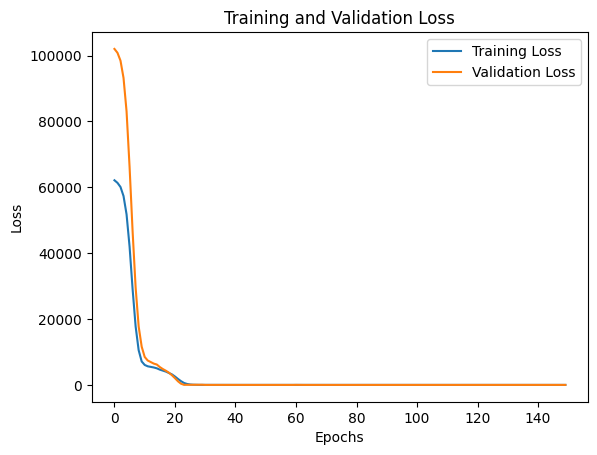

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# model = Sequential([layers.Input((9, 1)),
#                     layers.LSTM(64),
#                     layers.Dense(1)])

model = Sequential([layers.Input((9, 1)),
                   layers.LSTM(200),
                   layers.Dense(150, activation='relu'),
                   layers.Dense(100, activation='relu'),
                   layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['mean_absolute_error'])


history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150)

print(history.history.keys())

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

33/33 [==============================] - 0s 2ms/step


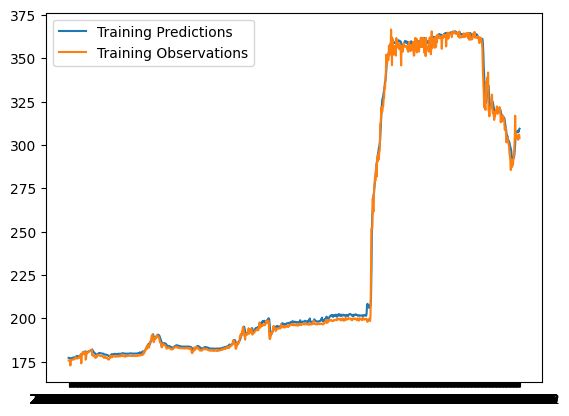

In [ ]:
from sklearn.metrics import mean_squared_error

train_predictions = model.predict(X_train).flatten()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

205.910485618345


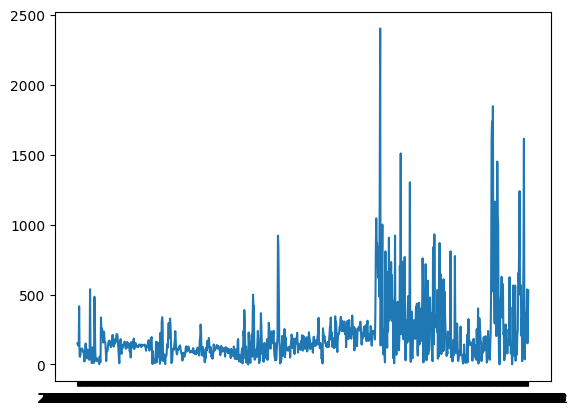

In [ ]:
import numpy as np

basis_point_value=0.01  #For USDLKR pair
train_data_basis_point_diff=((train_predictions/basis_point_value).flatten()-y_train/basis_point_value).abs()
plt.plot(dates_train, train_data_basis_point_diff)

average_train_data_basis_point_diff=np.mean(train_data_basis_point_diff)
print(average_train_data_basis_point_diff)

5/5 [==============================] - 0s 2ms/step


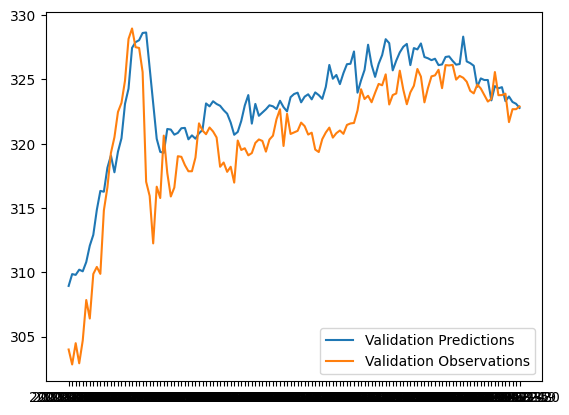

In [ ]:
val_predictions = model.predict(X_val).flatten()
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

277.5193586724811


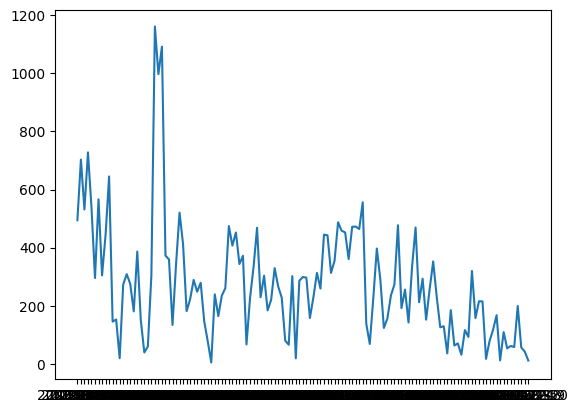

In [ ]:
basis_point_value=0.01  #For USDLKR pair
validation_data_basis_point_diff=((val_predictions/basis_point_value).flatten()-y_val/basis_point_value).abs()
plt.plot(dates_val, validation_data_basis_point_diff)

print(np.mean(validation_data_basis_point_diff))

5/5 [==============================] - 0s 2ms/step


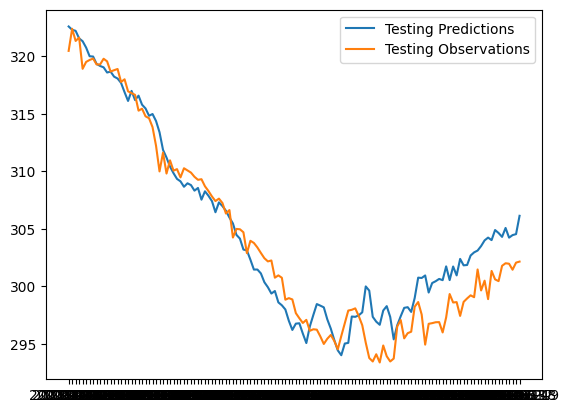

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Assuming test_predictions and y_test are lists or numpy arrays
# Calculate MSE and MAE
mse = mean_squared_error(y_test, test_predictions)
print("Mean Square Error:", mse)
mae=mean_absolute_error(y_test, test_predictions)
print("Mean Absolute Error:", mae)

Mean Square Error: 5.3505227020397275
Mean Absolute Error: 1.817773897445915


181.77742918269263


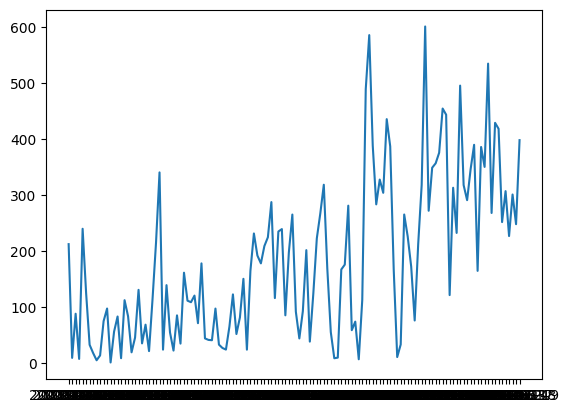

In [ ]:
basis_point_value=0.01  #For USDLKR pair
test_data_basis_point_diff=((test_predictions/basis_point_value).flatten()-y_test/basis_point_value).abs()
plt.plot(dates_test, test_data_basis_point_diff)

print(np.mean(test_data_basis_point_diff))

In [ ]:
#Start Trading with 1000 LKR with model


number_of_trading_days=dates_test.size
test_data=y_test.values
holding_currency="quote"
holding_value=1000
for current_trading_day in range(number_of_trading_days-1):
  if holding_currency=="quote":
    if (test_predictions[current_trading_day+1]>test_data[current_trading_day]):
      holding_value=holding_value/test_data[current_trading_day]
      holding_currency="base"
  else:
    if (test_predictions[current_trading_day+1]<test_data[current_trading_day]):
      holding_value=test_data[current_trading_day]*holding_value
      holding_currency="quote"


if holding_currency=="base":
  holding_value=test_data[current_trading_day]*holding_value

print(number_of_trading_days)
print(holding_value)
print(holding_currency)


130
1018.1897305767749
base


In [ ]:
#Start Trading with 1000 USD LKR actual values


number_of_trading_days=dates_test.size
test_data=y_test.values
holding_currency="quote"
holding_value=1000
for current_trading_day in range(number_of_trading_days-1):
  if holding_currency=="quote":
    if (test_data[current_trading_day+1]>test_data[current_trading_day]):
      holding_value=holding_value/test_data[current_trading_day]
      holding_currency="base"
  else:
    if (test_data[current_trading_day+1]<test_data[current_trading_day]):
      holding_value=test_data[current_trading_day]*holding_value
      holding_currency="quote"


if holding_currency=="base":
  holding_value=test_data[current_trading_day]*holding_value

print(number_of_trading_days)
print(holding_value)
print(holding_currency)

130
1139.506305144754
base


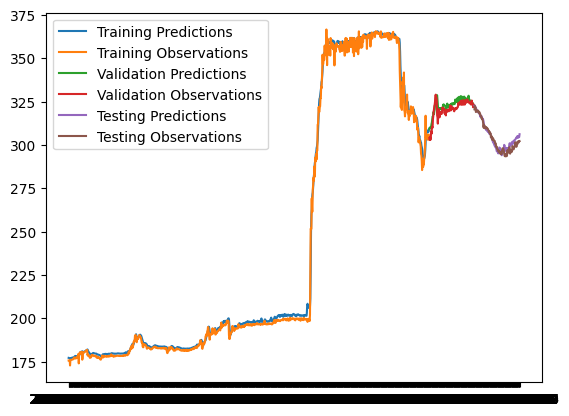

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

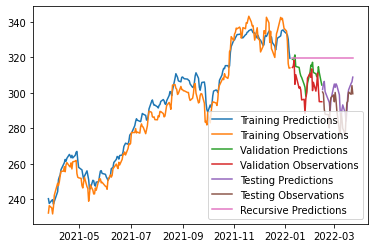

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])